In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import norm, multivariate_normal as mnorm
from math import sqrt
np.random.seed(45)

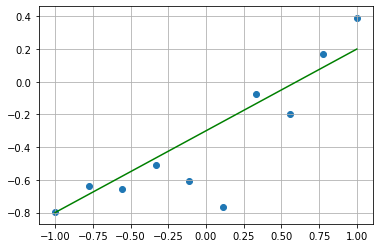

In [19]:
x = np.linspace(-1, 1, 10)
yl = []
for i in x:
    i = -0.3 + 0.5 * i + normal(0, sqrt(0.04))
    yl.append(i)
plt.scatter(x, yl)
plt.grid()
plt.plot(x, -0.3 + 0.5 * x, c="green")

In [20]:
def linear(x, w0, w1):
    return w0 + w1*x
    
def gaus(y, x, w0, w1):
    sd = 0.2
    constant = sqrt(np.pi * 2) * sd
    return constant * np.exp(-0.5 * ((y - linear(x, w0, w1))/sd) ** 2)

def posterior(s0, m0, phi, beta, t):
    s0inv = np.linalg.inv(s0)
    Sn = np.linalg.inv(s0inv + beta * phi.T@phi)
    inner_term = s0inv@(m0.reshape((2, 1))) + beta * phi.T * t
    Mn = Sn@inner_term
    return Mn.reshape((1, 2))[0], Sn

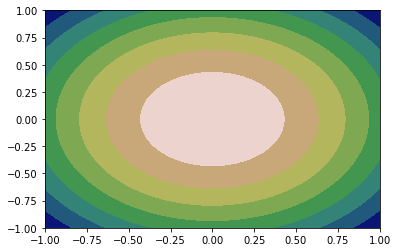

In [21]:
w0, w1 = np.meshgrid(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50))
g0 = norm.pdf(w0, 0, sqrt(2))
g1 = norm.pdf(w1, 0, sqrt(2))
prior = g0 * g1
plt.contourf(w0, w1, prior, cmap="gist_earth")

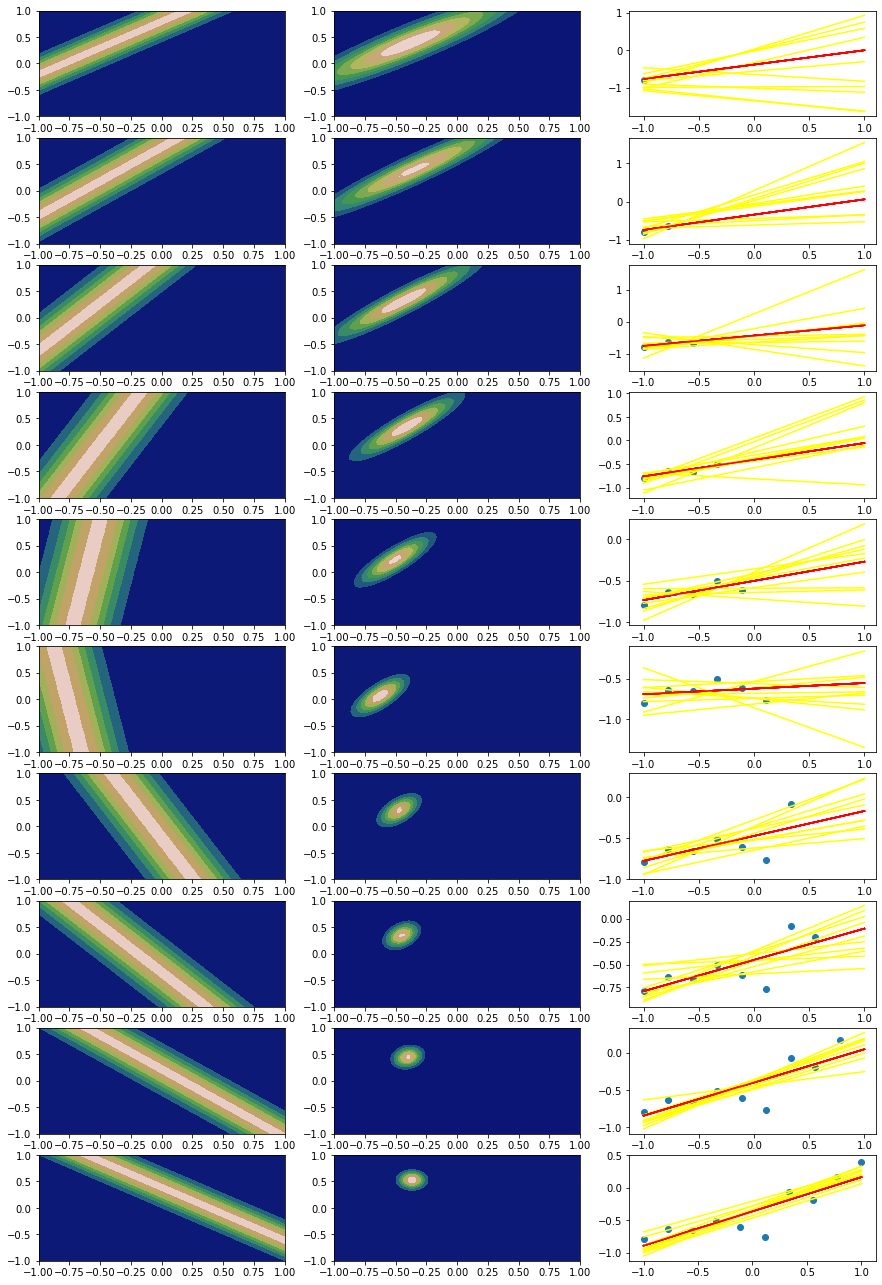

In [30]:
fig, axs = plt.subplots(10, 3, figsize=(15, 23))
c = 0
w0,w1 = np.meshgrid(np.linspace(-1,1,50), np.linspace(-1,1,50))
g0,g1 = norm.pdf(w0,0,sqrt(0.5)),norm.pdf(w1,0,sqrt(0.5)) #prior has mean 0, var 0.5
prior = g0*g1
m0, s0 = np.array([0, 0]), np.array([[0.5, 0], [0, 0.5]])
x1, y1 = [], []
beta =25

for i,j in zip(x,yl):
    maxlikelihood = gaus(j, i, w0, w1)
    post = prior * maxlikelihood
    prior = post
    phi = np.array([1, i]).reshape((1, 2))
    m0, s0 = posterior(s0, m0, phi, beta, j)
    dist = mnorm.rvs(m0, s0, 10) #multivariate normal
    x1.append(i)
    y1.append(j)
    
    axs[c, 0].contourf(w0, w1, maxlikelihood, cmap="gist_earth")
    axs[c, 1].contourf(w0, w1, post, cmap="gist_earth")
    for lines in dist:
        axs[c, 2].plot(x, lines[0] + lines[1] * x, c="yellow")
        axs[c, 2].plot(x, m0[0] + m0[1] * x, c="red")
    axs[c, 2].scatter(x1, y1)
    c = c + 1